In [71]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from data import resample_nba_data as re
from data import clean_nba_data as cl
from data import clean_and_split_nba_data as clean
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from models import plot_validation_curve as vc
from models import eval_model as evm
from joblib import dump
import joblib
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from mlxtend.evaluate import feature_importance_permutation
from sklearn.inspection import plot_partial_dependence

In [2]:
df=pd.read_csv('../data/processed/Train_Stg1_Output.csv')

In [3]:
df.shape, df.columns

((8000, 28),
 Index(['Id_old', 'Id', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made',
        '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL',
        'BLK', 'TOV', 'TARGET_5Yrs', 'gmm_probability',
        'logistic_reg_probability', 'rf_ds_probability', 'rf_us_probability',
        'xg_ds_probability', 'xg_us_probability'],
       dtype='object'))

In [182]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test =  clean.clean_and_split_nba_data(df)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'gmm_probability',
       'logistic_reg_probability', 'rf_ds_probability', 'rf_us_probability',
       'xg_ds_probability', 'xg_us_probability', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


In [5]:
x_data.head()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,...,TOV,gmm_probability,logistic_reg_probability,rf_ds_probability,rf_us_probability,xg_ds_probability,xg_us_probability,CALC3P%,CALCFG%,CALCFT%
718,44,11.5,5.2,2.3,4.2,0.5,1.0,0.4,0.8,1.7,...,0.9,0.0,0.501137,0.386223,0.485402,0.485590,0.439857,50.000000,54.761905,50.000000
4851,23,5.9,2.0,0.8,2.3,0.2,0.7,0.1,0.2,0.0,...,0.4,0.0,0.489893,0.368252,0.412756,0.324417,0.327457,28.571429,34.782609,50.000000
5194,56,9.3,3.8,1.4,2.6,0.1,0.2,1.4,2.3,1.1,...,0.6,0.0,0.500794,0.400689,0.436796,0.462939,0.458808,50.000000,53.846154,60.869565
1761,67,23.8,10.0,3.8,10.8,0.4,1.2,1.8,2.0,0.3,...,2.0,0.0,0.507572,0.629616,0.551934,0.605502,0.623453,33.333333,35.185185,90.000000
4098,55,13.1,5.0,2.0,3.5,0.1,0.2,1.0,1.6,1.5,...,0.7,0.0,0.502938,0.396955,0.472817,0.436043,0.439857,50.000000,57.142857,62.500000


In [6]:
x_train.head()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,...,TOV,gmm_probability,logistic_reg_probability,rf_ds_probability,rf_us_probability,xg_ds_probability,xg_us_probability,CALC3P%,CALCFG%,CALCFT%
97,44,21.4,6.4,2.2,6.7,0.0,0.1,2.5,3.3,0.9,...,1.8,1.0,0.505419,0.429055,0.545569,0.500947,0.502552,0.0,32.835821,75.757576
7684,86,18.1,10.7,4.4,7.5,0.0,0.0,2.5,4.6,2.4,...,2.5,1.0,0.516522,0.637954,0.581390,0.676121,0.673573,0.0,58.666667,54.347826
7953,48,5.5,1.6,0.6,1.6,0.0,0.0,0.2,0.5,0.3,...,0.4,1.0,0.492137,0.368252,0.412756,0.324417,0.327457,0.0,37.500000,40.000000
7113,71,15.5,5.6,2.3,4.9,0.2,0.8,0.9,1.1,1.2,...,0.5,0.0,0.503605,0.605517,0.521215,0.612665,0.562738,25.0,46.938776,81.818182
3474,49,5.0,1.6,0.6,1.5,0.0,0.0,0.3,0.5,0.2,...,0.1,1.0,0.492281,0.368252,0.412756,0.324417,0.327457,0.0,40.000000,60.000000


In [7]:
x_test.head()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,...,TOV,gmm_probability,logistic_reg_probability,rf_ds_probability,rf_us_probability,xg_ds_probability,xg_us_probability,CALC3P%,CALCFG%,CALCFT%
2539,38,12.0,4.2,1.2,2.7,1.0,2.6,1.6,1.9,0.2,...,0.7,0.0,0.498500,0.400689,0.440654,0.482185,0.458808,38.461538,44.444444,84.210526
4146,56,20.8,3.7,1.3,3.3,0.4,1.5,0.8,1.1,0.5,...,1.0,0.0,0.500656,0.386223,0.472233,0.362439,0.386535,26.666667,39.393939,72.727273
5452,52,8.5,2.5,0.9,2.2,0.0,0.1,0.0,0.0,0.2,...,0.2,1.0,0.492190,0.368252,0.412756,0.324417,0.327457,0.000000,40.909091,0.000000
40,53,15.8,6.2,2.3,4.9,0.1,0.5,1.9,3.0,0.9,...,0.9,0.0,0.503726,0.429055,0.531466,0.554734,0.557338,20.000000,46.938776,63.333333
946,60,34.2,13.1,5.0,12.3,0.6,1.7,2.3,3.3,1.1,...,2.7,0.0,0.514375,0.637954,0.575412,0.627141,0.623453,35.294118,40.650407,69.696970


In [8]:
x_val.head()

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,...,TOV,gmm_probability,logistic_reg_probability,rf_ds_probability,rf_us_probability,xg_ds_probability,xg_us_probability,CALC3P%,CALCFG%,CALCFT%
4143,40,8.5,2.5,1.0,1.9,0.0,0.0,0.6,1.0,0.8,...,0.4,1.0,0.496568,0.368252,0.423017,0.395084,0.377646,0.000000,52.631579,60.000000
2552,70,13.4,3.7,1.7,4.0,0.0,0.0,0.5,0.7,0.8,...,0.6,1.0,0.500181,0.577151,0.445076,0.468581,0.443817,0.000000,42.500000,71.428571
4074,59,21.9,10.5,4.2,10.9,1.0,2.9,1.1,1.8,0.4,...,1.9,0.0,0.505898,0.554951,0.501943,0.564560,0.480662,34.482759,38.532110,61.111111
5111,60,8.4,3.0,1.2,2.2,0.0,0.0,0.7,0.9,1.0,...,0.8,1.0,0.499011,0.577151,0.452800,0.522532,0.498618,0.000000,54.545455,77.777778
6510,71,12.5,4.2,1.6,3.2,0.0,0.0,0.9,1.5,1.8,...,0.9,1.0,0.503220,0.605855,0.499022,0.564377,0.562738,0.000000,50.000000,60.000000


In [13]:
default_xg = xgb.XGBClassifier(random_state=8, verbosity=1,use_label_encoder=False,objective ='binary:logistic',eval_metric='auc')

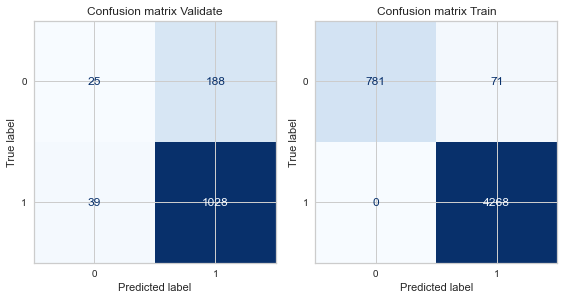

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=1)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=1),
 0.9998682739988823,
 0.6577125986157495)

In [14]:
evm.eval_model(default_xg,x_train,y_train,x_val,y_val)

(0.6409774436090225,
 0.81625,
 0.8969866853538893,
 0.8421052631578947,
 0.95952023988006,
 0.81625)

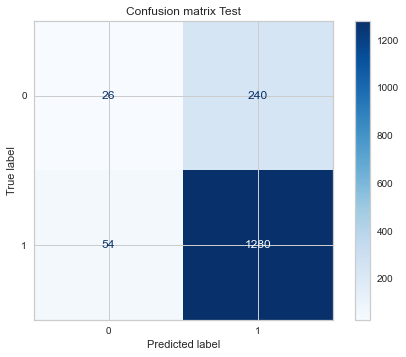

In [292]:
evm.get_performance(default_xg, x_test, y_test, "Test", True)

In [150]:
feat_imp = default_xg.get_booster().get_score(importance_type="gain")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

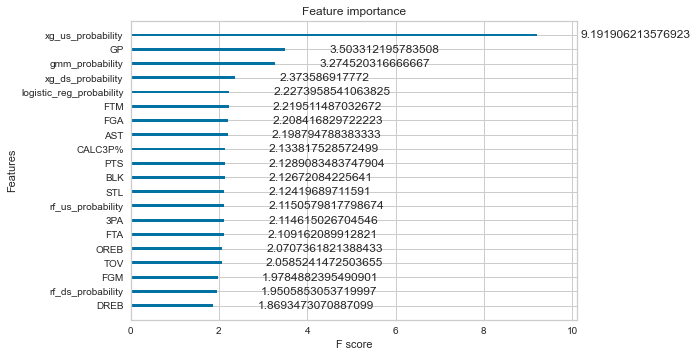

In [177]:
xgb.plot_importance(feat_imp, max_num_features=20)

In [167]:
feat_imp

{'xg_us_probability': 9.191906213576923,
 'GP': 3.503312195783508,
 'CALCFG%': 1.8252175492692941,
 'CALC3P%': 2.133817528572499,
 'OREB': 2.0707361821388433,
 'CALCFT%': 1.8647954180648505,
 'FGA': 2.208416829722223,
 'rf_us_probability': 2.1150579817798674,
 'TOV': 2.0585241472503655,
 'BLK': 2.12672084225641,
 'MIN': 1.7969503933390707,
 'REB': 1.769000985067882,
 'DREB': 1.8693473070887099,
 'FTM': 2.219511487032672,
 'logistic_reg_probability': 2.2273958541063825,
 'STL': 2.12419689711591,
 '3PA': 2.114615026704546,
 'PTS': 2.1289083483747904,
 'xg_ds_probability': 2.373586917772,
 'FTA': 2.109162089912821,
 'gmm_probability': 3.274520316666667,
 'AST': 2.198794788383333,
 '3P Made': 1.7237436749433963,
 'rf_ds_probability': 1.9505853053719997,
 'FGM': 1.9784882395490901}

In [152]:
r = permutation_importance(
    default_xg, x_train, y_train,
    n_repeats=30,
    random_state=8
)

In [163]:
feature_cols=x_train.columns
for i in r.importances_mean.argsort()[::-1]:
    print(f"{x_train.columns[i]}: {r.importances_mean[i]:.5f}")

GP: 0.06223
MIN: 0.04820
rf_us_probability: 0.04186
logistic_reg_probability: 0.03879
CALCFG%: 0.03712
FGA: 0.03121
REB: 0.02971
AST: 0.02618
CALCFT%: 0.02604
DREB: 0.02515
OREB: 0.02515
TOV: 0.02269
xg_us_probability: 0.01947
FTA: 0.01926
FGM: 0.01914
BLK: 0.01859
3PA: 0.01729
CALC3P%: 0.01673
PTS: 0.01534
xg_ds_probability: 0.01332
STL: 0.01184
rf_ds_probability: 0.01087
FTM: 0.00991
3P Made: 0.00448
gmm_probability: 0.00048


feature_name GP feature_index 0
feature_name MIN feature_index 1
feature_name rf_us_probability feature_index 19
feature_name logistic_reg_probability feature_index 17
feature_name CALCFG% feature_index 23
feature_name FGA feature_index 4
feature_name REB feature_index 11
feature_name AST feature_index 12
feature_name CALCFT% feature_index 24
feature_name DREB feature_index 10
feature_name OREB feature_index 9
feature_name TOV feature_index 15
feature_name xg_us_probability feature_index 21
feature_name FTA feature_index 8
feature_name FGM feature_index 3
feature_name BLK feature_index 14


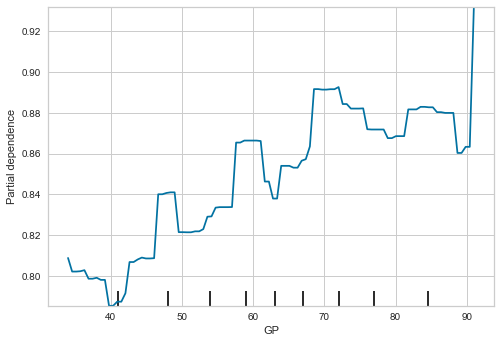

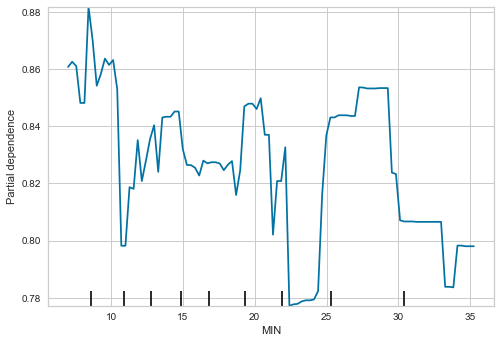

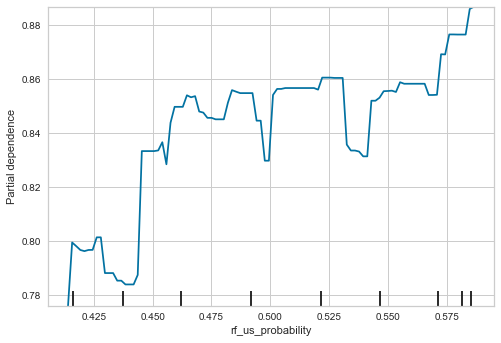

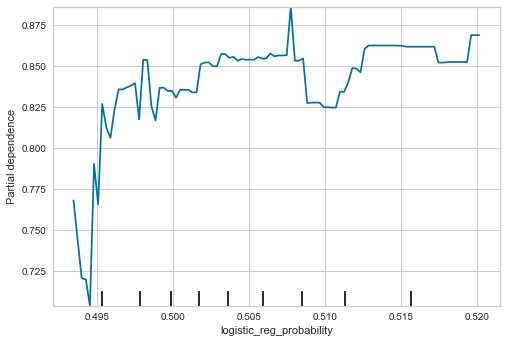

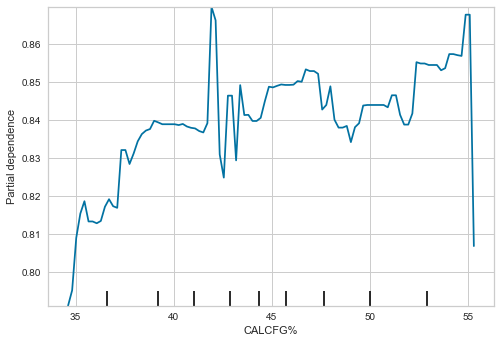

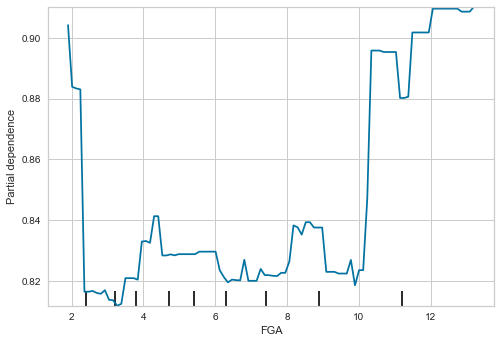

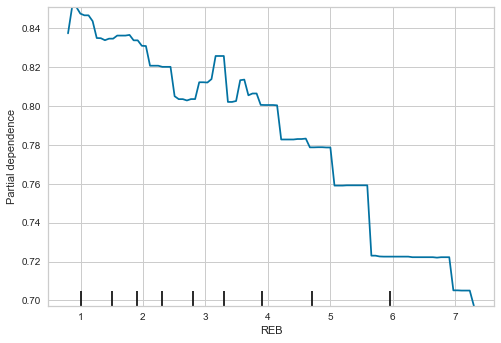

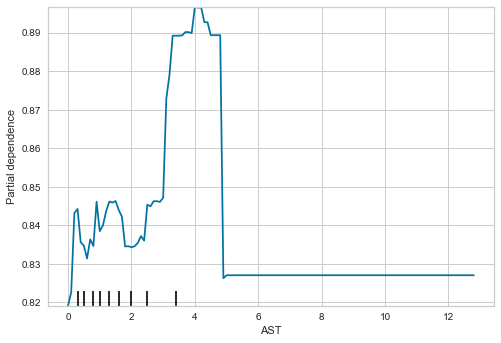

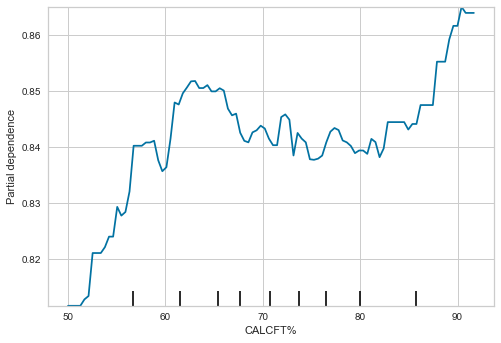

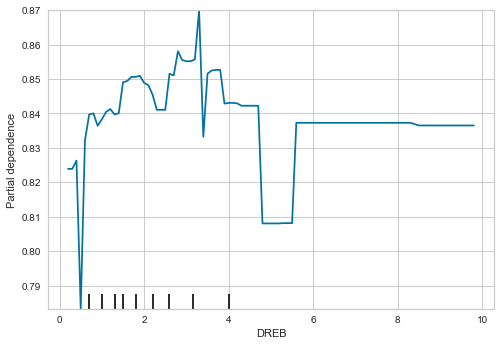

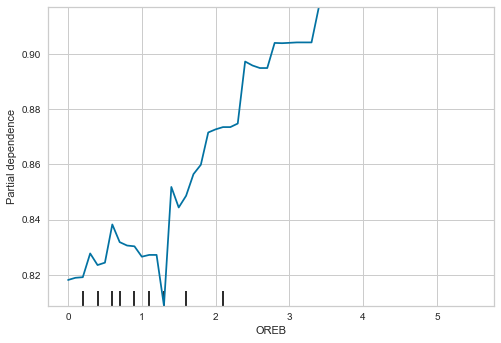

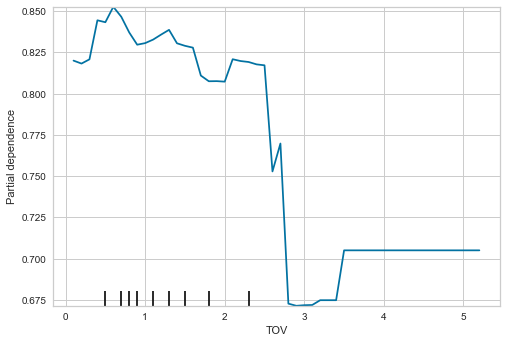

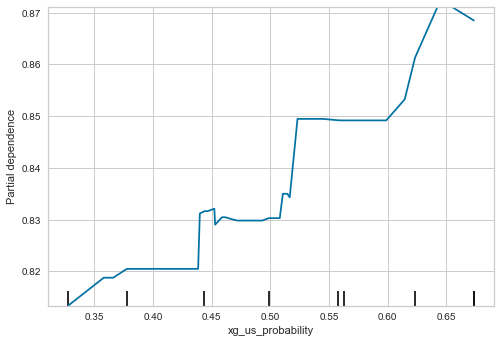

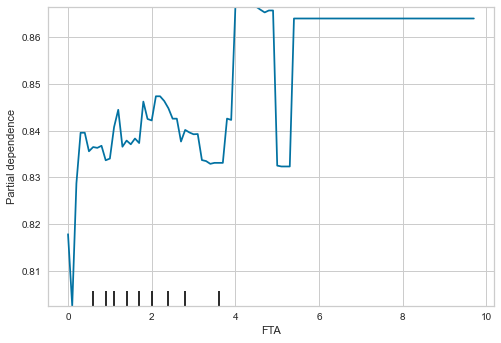

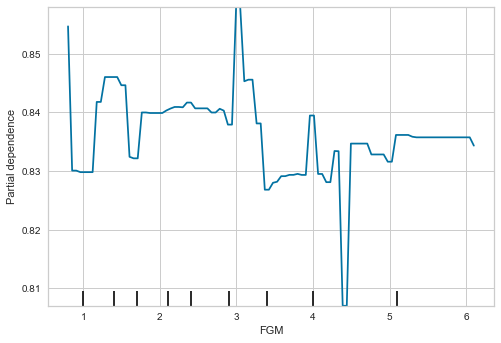

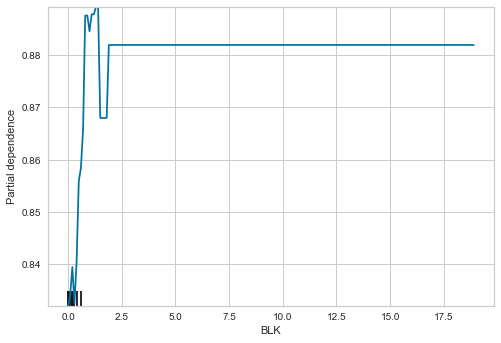

In [178]:
feature_cols=x_train.columns
k=0
for i in r.importances_mean.argsort()[::-1]:
    if k<=15:
        feature_name=x_train.columns[i]
        feature_index = feature_cols.get_loc(feature_name)
        print('feature_name',feature_name,'feature_index',feature_index)
        plot_partial_dependence(default_xg, x_train, features=[feature_index],target=y_train)
        k=k+1

# Future Insights
Looking at these numbers give me a lot of future potential to tune the numbers further
 - calculate the all rebound rates
 - investigte the Turnovers a bit more 

In [294]:
dump(default_xg,  '../models/sp_wk3_Stg2_Final_model.joblib')

['../models/sp_wk3_Stg2_Final_model.joblib']